# Plotting Maps: Seismograph and Seismicity in Vietnam

---
## What we do in this notebook:
- Learn Jupyter notebook and google colab server
- Plot geographical maps and geoscientific data
- Download station/earthquake metadata from remote servers

In [ ]:
# set up colab environment - uncomment the next line if running in colab

# !pip install basemap obspy basemap-data-hires

---
## Plot a base map using `Basemap` package

In the following cell, we plot a map of Vietnam in the `Mercator` projection. A complete list of projections supported in `basemap` is [here](https://matplotlib.org/basemap/stable/users/mapsetup.html).

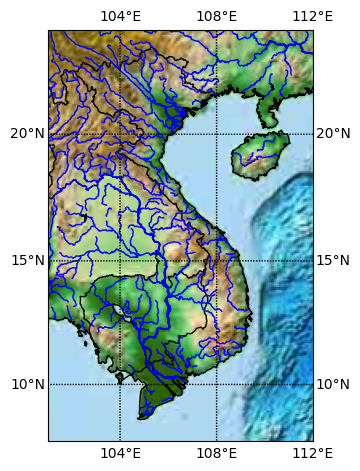

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a new figure and axis object
fig, ax = plt.subplots()

# Initialize the basemap, specifing the projection, the gegraphic buondary, and resolution
# the initialzed map instance is attached to the axis ax
m = Basemap(projection='merc',ax=ax, llcrnrlat=7.7, urcrnrlat=24, llcrnrlon=101, urcrnrlon=112, resolution='i')

# Draw coastlines
m.drawcoastlines(linewidth=1)
# Draw country boundaries
m.drawcountries(linewidth=1)
# Draw rivers
m.drawrivers(linewidth=1, color='blue')

# Draw parallels and meridians
m.drawparallels(range(10, 25, 5), labels=[1,1,0,0])
m.drawmeridians(range(100, 125, 4), labels=[0,0,1,1])

# Draw etopo relief as map background (note: the data is hard-coded in the basemap module)
m.etopo()

# stretch out the axis to fir the figure space
fig.tight_layout()
plt.show()

Congratulations on your first map!

Learn more about map background [here](https://matplotlib.org/basemap/stable/users/geography.html)

You can try different backgrounds such as

    drawlsmask(): draw a high-resolution land-sea mask as an image, with land and ocean colors specified. The land-sea mask is derived from the GSHHS coastline data, and there are several coastline options and pixel sizes to choose from.

    bluemarble(): draw a NASA Blue Marble image as a map background.

    shadedrelief(): draw a shaded relief image as a map background.

    etopo(): draw an etopo relief image as map background.

    warpimage(): use an abitrary image as a map background. The image must be global, covering the world in lat/lon coordinates from the international dateline eastward and the South Pole northward.

---
## Download metadata from remote data centers

Now, we will retrieve some seismic metadata remotely and plot over the basemap. For the demonstration purposes, we will plot available seismic stations and cataloged earthquakes in and around Vietnam.

In the next cell, we will use a programming Python interface to retrieve for metadata from remote servers and plot the data on the map. Exact same data can be downloaded from the servers' web interface. I prefer the programming interface thanks to its inclusiveness and conveniences. Some popular seismological data centres include
- IRIS Station metadata search: https://ds.iris.edu/mda/
- IRIS Data management center: https://ds.iris.edu/wilber3/find_event
- Global Centroid-Moment Tensor: https://www.globalcmt.org/
- International Seismological Centre: https://www.isc.ac.uk/iscbulletin/search/
- US Geophiscal Survey: https://earthquake.usgs.gov/earthquakes/map/

We will also use several objects defined in the `ObsPy` package (further reading [here](https://docs.obspy.org/)). ObsPy is perhaps the most popular Python package for observational seismology. It has rich function libararies for many seismological analyses.

Inventory created at 2025-04-07T06:48:45.843500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2000-01-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (4):
			CD, IC, PS, RM
		Stations (5):
			CD.QIZ (Qiongzhong, Hainan Province, China)
			IC.QIZ (Qiongzhong, Hainan Province, China)
			PS.VIVO (Vinh, Vietnam)
			RM.DLV (Dalat Central Vietnam)
			RM.SLV (Son La Vietnam)
		Channels (35):
			CD.QIZ..LHZ, CD.QIZ..LHN, CD.QIZ..LHE, IC.QIZ.00.LHZ (5x), 
			IC.QIZ.00.LHN (2x), IC.QIZ.00.LHE (2x), IC.QIZ.00.LH1 (2x), 
			IC.QIZ.00.LH2 (6x), IC.QIZ.10.LHZ (2x), IC.QIZ.10.LH1 (2x), 
			IC.QIZ.10.LH2 (2x), PS.VIVO..LHZ, PS.VIVO..LHX, PS.VIVO..LHY, 
			RM.DLV..LHZ, RM.DLV..LHN, RM.DLV..LHE, RM.SLV..LHZ, RM.SLV..LHN, 
			RM.SLV..LHE


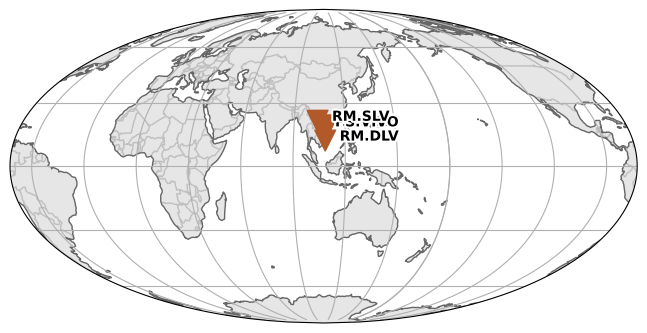

In [8]:
# initialize a local client object to iris with IRIS remote data center 
# internet connection is required for communication
from obspy.clients.fdsn import Client
client = Client("IRIS")

# define a regional box latitude 7.7 to 24, longitude 101 to 110.5
minlatitude = 7.7
maxlatitude = 24
minlongitude = 101
maxlongitude = 110.5
# define the time period of interest
from obspy import UTCDateTime
startime = UTCDateTime("2000-01-01")
endtime = UTCDateTime("2025-01-01")
# query for seismic stations available in the box and during the time period
inventory = client.get_stations(minlatitude=minlatitude, maxlatitude=maxlatitude,
                                minlongitude=minlongitude, maxlongitude=maxlongitude,
                                starttime=startime, endtime=endtime, channel="LH*", level="channel")

# The first way to inspect the content of the inventory object is to print it              
print (inventory) 
# The second way is to use the plot method of the inventory object using its built-in plot method
inventory.plot()
plt.show()
# Later we will use the inventory object to plot the station locations on our custom map

This graphy below visualizes the hierarchy of the Inventory class. The design is to handle station metadata consistently. 
![Inventory hierarchy](https://docs.obspy.org/_images/Inventory.png)

1795 Event(s) in Catalog:
2000-01-06T14:25:31.500000Z | +23.323, +103.746 | 4.1  MD
2000-01-18T08:00:12.700000Z | +20.705, +107.251 | 2.5  MD
...
2024-12-06T07:55:28.200000Z | +22.210, +101.390 | 3.29 ML
2024-12-08T10:19:12.160000Z | +14.926, +108.413 | 3.5  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'


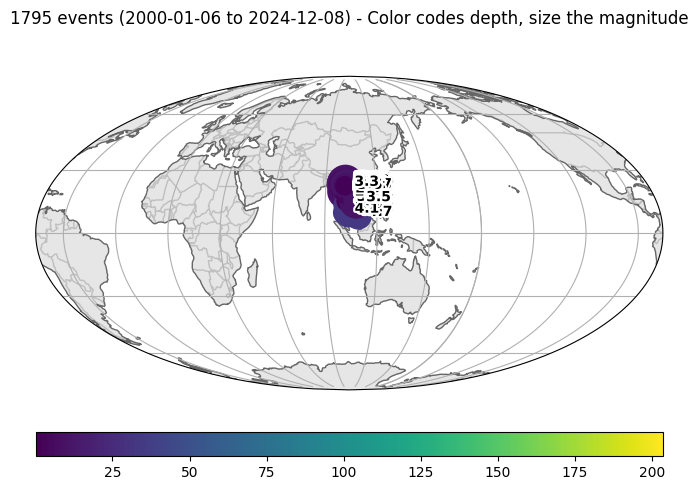

In [24]:
# We can also query for seismic events in the same box and during the same time period
# The events are stored in a catalog object
# The catalog object is a list of events, each event is an Event object
# The catalog object has a method to plot the events on a map
isc = Client('ISC')
catalog = isc.get_events(minlatitude=minlatitude, maxlatitude=maxlatitude,
                            minlongitude=minlongitude, maxlongitude=maxlongitude,
                            starttime=startime, endtime=endtime, 
                            # we request events with magnitude greater than 2
                            minmagnitude=0)
print (catalog)
catalog.plot()
plt.show()

Similarly, the graph below show the hierarchy of the `Catalog` class.
![Catalog hierarchy](https://docs.obspy.org/_images/Event.png)

---
## Plot stations and earthquakes on the custom map

The built-in maps above are busy and we also do not have flexivity to control the plotting output. That's why we need to work on our own map to analyse data in the way we want.

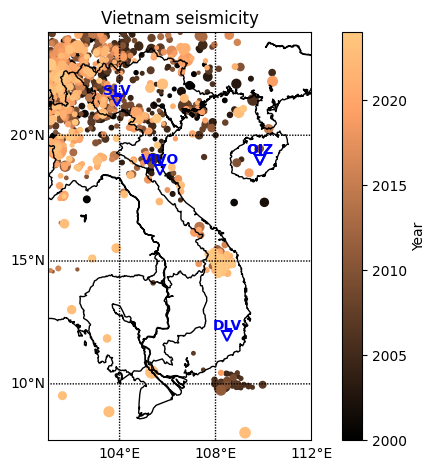

In [61]:
import numpy as np

## We follow the same procedure as above to create the map background.
fig, ax = plt.subplots()
# initialize the basemap, specifing the projection, the gegraphic buondary, and resolution
# the initialzed map instance is attached to the axis ax
m = Basemap(projection='merc',ax=ax, llcrnrlat=7.7, urcrnrlat=24,
            llcrnrlon=101, urcrnrlon=112, resolution='i')
# draw coastlines
m.drawcoastlines(linewidth=1)
# draw country boundaries
m.drawcountries(linewidth=1)
# draw parallels and meridians
m.drawparallels(range(10, 25, 5), labels=[1,0,0,0])
m.drawmeridians(range(100, 125, 4), labels=[0,0,0,1])


# Here we plot seismic events as circles on the map.
# The size of the circle is proportional to the magnitude of the event
# The color of the circle is proportional to the time of the event.
evla = np.array([e.origins[0].latitude for e in catalog])
evlo = np.array([e.origins[0].longitude for e in catalog])
evmag = np.array([e.magnitudes[0].mag for e in catalog])
evyear = np.array([e.origins[0].time.year for e in catalog])
# latlon=True means that the coordinates are in latitude and longitude
mappable = m.scatter(evlo, evla, c=evyear, cmap='copper', latlon=True, s=np.exp(evmag)/2)

# Plot the station locations as triangles on the map.
# We use text to label the stations with their codes.
for net in inventory:
    for sta in net:
        lon = sta.longitude
        lat = sta.latitude
        # the coordinates are converted to map coordinates using the basemap instance
        x, y = m(lon, lat)
        # plot the station location using projected coodindates when latlon=False by default
        m.plot(x, y, marker='v', color='none', ms=7, mec='b', mew=1.5)
        # station lable
        plt.text(x, y+3e4, sta.code, fontsize=10, ha='center', fontweight='bold', color='blue')

# add a colorbar to the map representing the time evolution of the events
bar = fig.colorbar(mappable, ax=ax, label='Year')

# add a title to the map
ax.set_title('Vietnam seismicity')

# stretch out the axis to fir the figure space
fig.tight_layout()
plt.show()

---
## Kon Tum 2023 earthquake sequences

We now focus on the Dak Nong earthquake sequences to see its time evolutions as function of time and it correlation with dam charging activities.

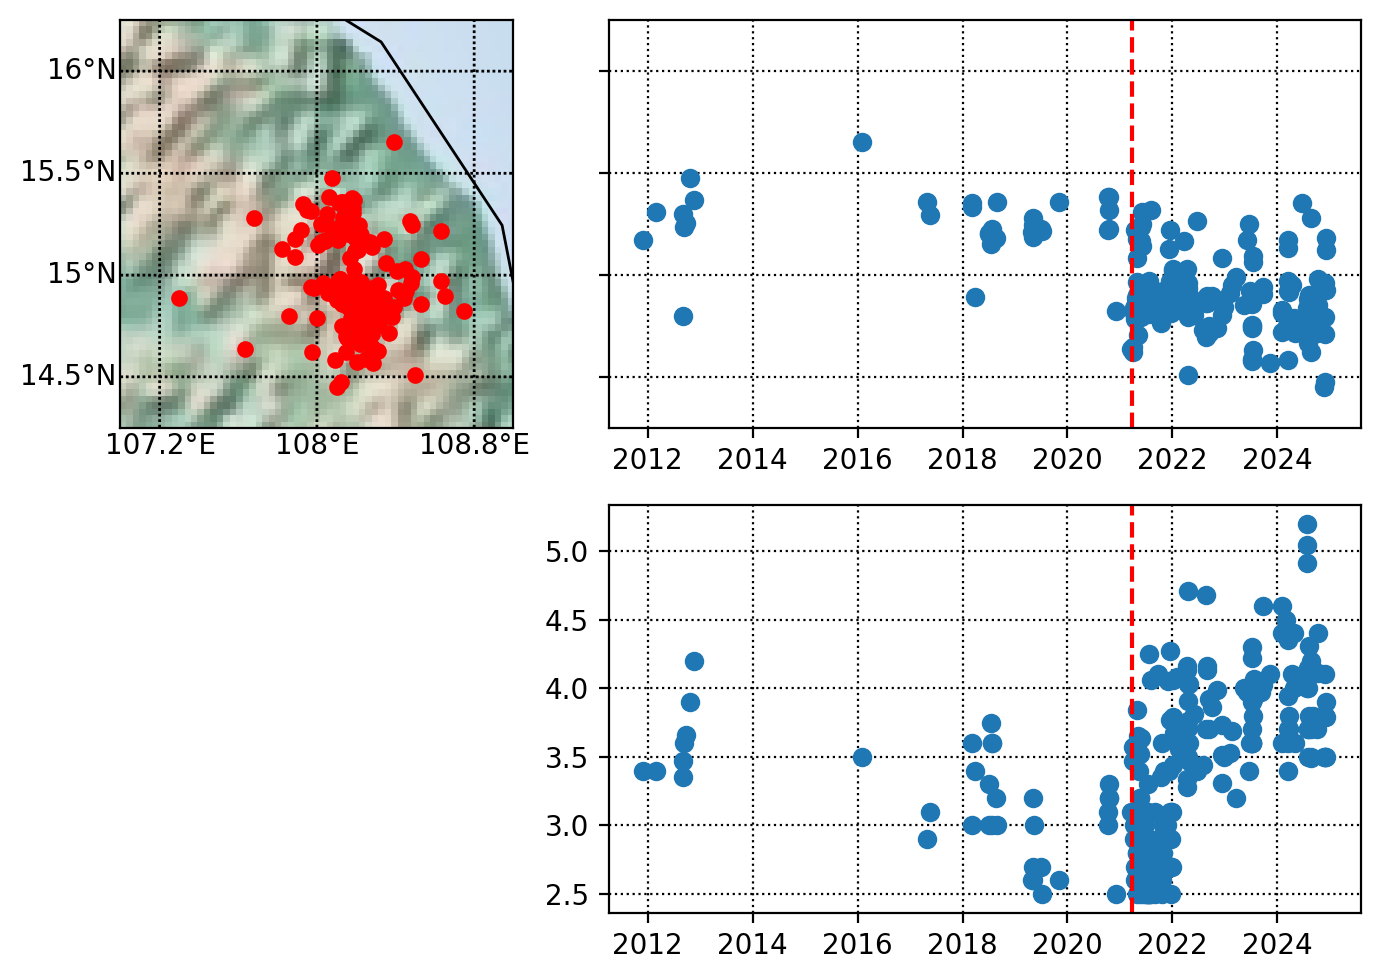

In [112]:
import matplotlib.dates as mdates
from datetime import datetime

cat = catalog.filter("latitude < 16.", "latitude > 14.", 
        "longitude > 107", "longitude < 109")

evtime = [e.origins[0].time.datetime for e in cat]
evmag = [e.magnitudes[0].mag for e in cat]
evlat = [e.origins[0].latitude for e in cat]
evlon = [e.origins[0].longitude for e in cat]


fig, ax  = plt.subplots(2, 2, figsize=(7, 5), width_ratios=(1, 1.9), dpi=200)

m = Basemap(projection='merc', ax=ax[0, 0], llcrnrlat=14.25, urcrnrlat=16.25,
            llcrnrlon=107, urcrnrlon=109, resolution='c')

m.drawparallels(np.arange(14, 16.5, .5), labels=[1,0,0,0])
m.drawmeridians(np.arange(107.2, 109, .8), labels=[0,0,0,1])
m.drawcoastlines(linewidth=1, color='k')
m.shadedrelief(scale=1)

m.plot([e.origins[0].longitude for e in cat],
       [e.origins[0].latitude for e in cat], 'ro', markersize=5, latlon=True)

ax[0, 1].plot(evtime, evlat, 'o')
ax[0, 1].set(yticks=np.arange(14, 16.5, .5), yticklabels=[], ylim=(14.25, 16.25))
ax[0, 1].axvline(datetime(2021, 3, 24), color='red', linestyle='--', label='March 24, 2021')
ax[0, 1].grid(ls=':', color='k')

ax[1, 1].plot(evtime, evmag, 'o')
ax[1, 1].axvline(datetime(2021, 3, 24), color='red', linestyle='--', label='March 24, 2021')
ax[1, 1].grid(ls=':', color='k')

ax[1, 0].set(frame_on=False, xticks=[], yticks=[])

# ax.xaxis.set_major_locator(mdates.YearLocator(4))

# e24 = cat[np.argmax(evmag)]
fig.tight_layout()

plt.show()

![Kon Tum Thuong](https://drive.google.com/file/d/1ut9D5k-GEQ7fTXJqReYPXNOGEGpbPvZ4/view?usp=sharing)